# Environment Setup

In [1]:
# Check who is the user running Jupyter.
who_am_i = !whoami

# Define our data base path.
base_path_data = '../input' if who_am_i[0] == 'root' else '../../data'

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir(base_path_data))

# Any results you write to the current directory are saved as output.

['.DS_Store', 'csv_submission_20181102-1155.csv', 'test.csv', 'csv_submission.csv', 'train.csv', 'gender_submission.csv']


# Data Set Loading

In [3]:
df = pd.read_csv(base_path_data + '/train.csv', sep=",", header=0, encoding='utf-8')
df.shape

(891, 12)

# Statistics

In [4]:
print('\nStats')
print(df.describe())


Stats
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Check which columns have missing data.
print('\nMissing values')
print(df.isnull().any())


Missing values
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [6]:
print('Column types')
print(df.dtypes)

Column types
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
# Copied from article: https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation
def num_missing(x):
    return sum(x.isnull())

def print_missing_values(df, axis):
    print("Missing values per %s:" % ('column' if axis == 0 else 'row'))
    print(df.apply(num_missing, axis=axis)[:df.shape[1]]) # axis=0 to apply on each column

# Applying per column
print_missing_values(df, 0)

# Applying per row:
print_missing_values(df, 1)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values per row:
0     1
1     0
2     1
3     0
4     1
5     2
6     0
7     1
8     1
9     1
10    0
11    0
dtype: int64


In [8]:
{'Survived':df.query('Survived == 1').count()[0], 'Did not':df.query('Survived == 0').count()[0]}

{'Survived': 342, 'Did not': 549}

In [9]:
# Check people age under 1.
df.query('Age < 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


# Visualization of Data

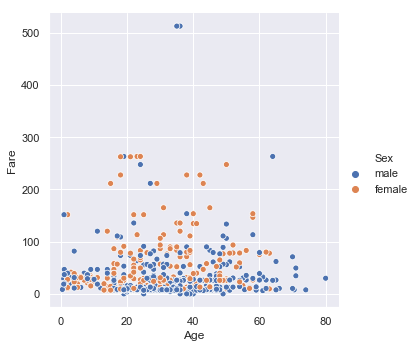

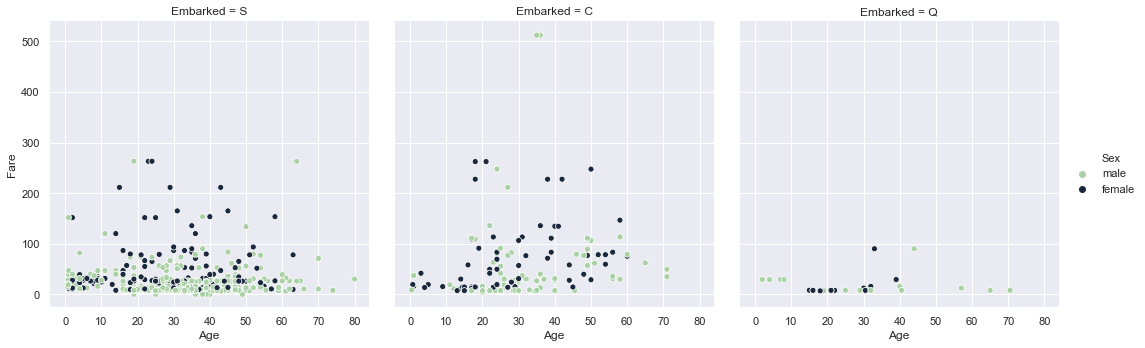

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Remove outliers.
# df = df[df.Fare < 300]

# http://seaborn.pydata.org/tutorial/relational.html
sns.relplot(x="Age", y="Fare", hue="Sex", data=df) # size="Fare", sizes=(0, 100), 
sns.relplot(x="Age", y="Fare", hue="Sex", col="Embarked", palette="ch:r=-.5,l=.75", data=df) # size="Fare", sizes=(0, 100), 
# plt.title('Fare per age')
plt.show()

In [11]:
# Group by age and count to see the distribution.
age_2_count = df.groupby('Age')['PassengerId'].count().reset_index(name="Count")

# Transpose for the sake of visibility.
age_2_count.loc[:15,].transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
Count,1.00,1.00,2.00,2.00,1.00,7.0,10.0,6.0,10.0,4.0,3.0,3.0,4.0,8.0,2.0,4.0


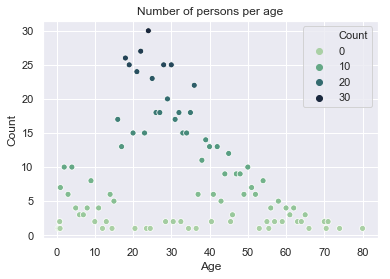

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# Set the plot.
sns.scatterplot(x="Age", y="Count", hue="Count", palette="ch:r=-.5,l=.75", data=age_2_count) # size="Fare", sizes=(0, 100), 

plt.title('Number of persons per age')
plt.show()

# Cleaning and Imputing Initial Data Set

## Imputation of Missing Values

In [13]:
print_missing_values(df, 0)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
# One method to show entries with NA values for Embarked column.
# nans = lambda df: df[df.isnull().any(axis=1)]
# nans(df_raw.loc[:, ['Embarked']])

# Another method to show entries, not working
# print(df_raw[df_raw['Embarked'].apply(np.isnan)])

# Preferred method to show entries where Embarked is null, NaN, etc.
print(df.query('Embarked != Embarked').loc[:, ['PassengerId', 'Embarked']])
print('\n' + str(df.isnull().any()))

# Show the most frequent value in the features.
df['Age'].mode().values[0]

     PassengerId Embarked
61            62      NaN
829          830      NaN

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


24.0

In [15]:
from sklearn.impute import SimpleImputer
class DataPreparator:
    def impute(self, df, df_for_fitting=None, strategy='mean', column=None):
        """
        Impute the data frame using a strategy on a column.

        Parameters
        ----------
        df: DataFrame: the data frame to transform with the fitted value.
        df_for_fit: None or the data frame to fit the Imputer. If None then df is used for fitting.
        strategy: a string for the strategy name defined from sklearn.preprocessing.Imputer.
        column: a string for the name of the column to apply the imputation.

        Returns
        -------
        DataFrame: the 'df' with a new column called 'column'_imputed instead of the 'column'.

        """
        # Define the imputer working on columns. 
        imp = SimpleImputer(missing_values=np.nan, strategy=strategy)

        # Get the dataframe used to fit the imputer.
        df_fit = df_for_fitting if df_for_fitting is None else df

        # Column extractor
        extract_column_df = lambda df: np.array([df[column]]).transpose()

        # Fit the imputer with a DF of shape (*, 1).
        df_ = extract_column_df(df_fit)
        model = imp.fit(df_)

        # Transform the df of shape (*, 1).
        df_ = extract_column_df(df)
        res = pd.DataFrame(model.transform(df_))
        res.columns = [column]

        # Make a copy to add the new column and remove the old one.
        df_tmp = df.drop(column, axis=1)
        new_column = column + '_imputed'
        df_tmp[new_column] = np.array(res[column])

        return df_tmp

data_prep = DataPreparator()

In [16]:
# Proceed to impute the Age column.
# X_aug = X_train2 # pd.concat([X, X_train.loc[:, 'Age']], axis=1)
# print(X_aug['Age'])

# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# cc = 'Age'
# aaa = np.array([X_train2[cc]]).transpose()
# print(aaa.shape)
# model_imp2 = imp.fit(aaa)
# model_imp2.transform(np.array([X_test[cc]]).transpose())

# print(X_train.query('Age != Age').loc[:, ['PassengerId','Age']].iloc[:10, :])
df_tmp = data_prep.impute(df, df, column='Age')
df_tmp = data_prep.impute(df_tmp, df, column='Cabin', strategy='most_frequent')
df_tmp = data_prep.impute(df_tmp, df, column='Embarked', strategy='most_frequent')

print(df.shape, df_tmp.shape)

print_missing_values(df_tmp, 0)

(891, 12) (891, 12)
Missing values per column:
PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Age_imputed         0
Cabin_imputed       0
Embarked_imputed    0
dtype: int64


## Features Selection

In [17]:
# First keep the columns of interest.

def select_features(df):
    _columns_to_keep = list(set(df.columns) - set(['PassengerId', 'Survived', 'Name', 'SibSp', 'Ticket', 'Cabin_imputed']))
    return df.loc[:, _columns_to_keep]

# Add the function as a class method to the DataPreparator.
DataPreparator.select_features = lambda self, df: select_features(df)

In [18]:
df_tmp = data_prep.select_features(df_tmp)

# Check the data.
print_missing_values(df_tmp, 0)
print(df_tmp.dtypes)

Missing values per column:
Sex                 0
Parch               0
Fare                0
Pclass              0
Embarked_imputed    0
Age_imputed         0
dtype: int64
Sex                  object
Parch                 int64
Fare                float64
Pclass                int64
Embarked_imputed     object
Age_imputed         float64
dtype: object


## One-hot Encoding of Categorical Features

In [19]:
def get_one_hot(df, features=None):
    """
    Does the one-hot vectorization of features.
    """
    X = df.loc[:, features]

    # Use one-hot encoding for categorical data.
    X_dummies = pd.get_dummies(X, columns=features, dtype=float)
    X = df.drop(features, axis=1)
    return pd.concat([X, X_dummies], axis=1)

# Add the one-hot method to the DataPreparator class.
DataPreparator.get_one_hot = lambda self, df, features=[]: get_one_hot(df, features)    
    
# Prepare the data sets.
X_final = data_prep.get_one_hot(df_tmp, features=['Embarked_imputed', 'Sex'])
Y_final = df.loc[:, 'Survived'] # Get the label from the original data frame df.

# Check data.
print(X_final.shape, Y_final.shape)
X_final.iloc[:5,], df_tmp.iloc[:5,]

(891, 9) (891,)


(   Parch     Fare  Pclass  Age_imputed  Embarked_imputed_C  \
 0      0   7.2500       3         22.0                 0.0   
 1      0  71.2833       1         38.0                 1.0   
 2      0   7.9250       3         26.0                 0.0   
 3      0  53.1000       1         35.0                 0.0   
 4      0   8.0500       3         35.0                 0.0   
 
    Embarked_imputed_Q  Embarked_imputed_S  Sex_female  Sex_male  
 0                 0.0                 1.0         0.0       1.0  
 1                 0.0                 0.0         1.0       0.0  
 2                 0.0                 1.0         1.0       0.0  
 3                 0.0                 1.0         1.0       0.0  
 4                 0.0                 1.0         0.0       1.0  ,
       Sex  Parch     Fare  Pclass Embarked_imputed  Age_imputed
 0    male      0   7.2500       3                S         22.0
 1  female      0  71.2833       1                C         38.0
 2  female      0   7.

In [20]:
# Check the data.
print_missing_values(X_final, 0)
print(X_final.dtypes)

Missing values per column:
Parch                 0
Fare                  0
Pclass                0
Age_imputed           0
Embarked_imputed_C    0
Embarked_imputed_Q    0
Embarked_imputed_S    0
Sex_female            0
Sex_male              0
dtype: int64
Parch                   int64
Fare                  float64
Pclass                  int64
Age_imputed           float64
Embarked_imputed_C    float64
Embarked_imputed_Q    float64
Embarked_imputed_S    float64
Sex_female            float64
Sex_male              float64
dtype: object


## Split Dataset into Training and CV datasets

In [21]:
from sklearn.model_selection import train_test_split

# Divide into training and cross-validation datasets.
X_train, X_test, Y_train, Y_test = train_test_split(X_final, Y_final, test_size=0.2, random_state=42)

# Check the data.
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(712, 9) (712,)
(179, 9) (179,)


# 5-fold Cross Validation on 4 Different Classifiers

In [22]:
from sklearn.base import clone

class HelperCrossValidation:
    """
    Helper class for running cross validations.
    """
    def print_features_importance(self, df, clf):
        if not hasattr(clf, 'feature_importances_'):
            return
        
        # Display the features by descending importance.
        df_disp = pd.DataFrame(list(zip(list(df.columns), clf.feature_importances_)))
        df_disp.columns = ['Feature', 'Percentage']
        print(df_disp.sort_values(by='Percentage', ascending=False)[:10].to_string(index=False))

    def cross_val_score_do(self, name, clf, X, Y, cv):
        # Cross validate the classifier.
        scores = cross_val_score(clf, X, Y, cv=cv)
        print("\n%s Score: %.10f" % (name, scores.mean()))

        # Fit the classifier and show the feature importance.
        clf_cloned = clone(clf)
        model = clf_cloned.fit(X, Y)

        # Display the features by descending importance.
        self.print_features_importance(X, clf_cloned)

        return model

# Setting Training Dataset and Classifiers

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Setup.
X = X_train
Y = Y_train

# Instanciate a HelperCrossValidation
helper_cv = HelperCrossValidation()

# Model.
clf_lr = LogisticRegression(penalty='l2', C=0.1)
model_lr = helper_cv.cross_val_score_do('RandomForestClassifier', clf_lr, X, Y, 5)

clf_rfc = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=101)
model_rfc = helper_cv.cross_val_score_do('RandomForestClassifier', clf_rfc, X, Y, 5)

clf_etc = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=290)
model_etc = helper_cv.cross_val_score_do('ExtraTreesClassifier', clf_etc, X, Y, 5)

clf_dtc = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=13)
model_dtc = helper_cv.cross_val_score_do('DecisionTreeClassifier', clf_dtc, X, Y, 5)

clf_gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.5, max_depth=1, random_state=43)
model_gbc = helper_cv.cross_val_score_do('GradientBoostingClassifier', clf_gbc, X, Y, 5)

# SGDClassifier(max_iter=5)


RandomForestClassifier Score: 0.7865621942


/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/hujol/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs


RandomForestClassifier Score: 0.7964013711
Feature  Percentage
              Fare    0.273300
       Age_imputed    0.256240
          Sex_male    0.171990
            Pclass    0.116592
        Sex_female    0.115226
             Parch    0.035618
Embarked_imputed_S    0.012500
Embarked_imputed_Q    0.010982
Embarked_imputed_C    0.007552

ExtraTreesClassifier Score: 0.7809476708
Feature  Percentage
       Age_imputed    0.258860
              Fare    0.258746
        Sex_female    0.151809
          Sex_male    0.143136
            Pclass    0.118364
             Parch    0.040115
Embarked_imputed_C    0.014525
Embarked_imputed_S    0.009717
Embarked_imputed_Q    0.004729

DecisionTreeClassifier Score: 0.7669218405
Feature  Percentage
        Sex_female    0.309004
              Fare    0.271161
       Age_imputed    0.242642
            Pclass    0.134593
             Parch    0.021744
Embarked_imputed_S    0.011610
Embarked_imputed_C    0.007747
Embarked_imputed_Q    0.001500
    

# ROC Visualization

lr Accuracy :0.786516853932584


/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


dtc Accuracy :0.980337078651685
etc Accuracy :0.980337078651685
gbc Accuracy :0.821629213483146


/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depreca

rfc Accuracy :0.956460674157303


/Users/hujol/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


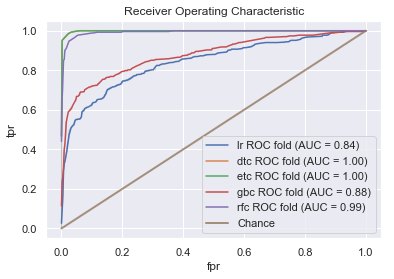

In [24]:
from sklearn import metrics

def plot_roc(models={}, X=None, Y=None):
    for name in models:
        model = models[name]
        
        # Evaluate.
        y_pred_proba = model.predict_proba(X)[::, 1] # Dont know why take index=1 or 0?!?!
        print("%s Accuracy :%.15f" % (name, metrics.accuracy_score(Y, model.predict(X))))

        # Compute the probabilities.
        fpr, tpr, _ = metrics.roc_curve(Y, y_pred_proba, pos_label=1)
        roc_auc = metrics.auc(fpr, tpr)

        # Plot the ROC.
        fpr_tpr = pd.DataFrame(list(zip(fpr.ravel(), tpr.ravel())))
        fpr_tpr.columns = [ 'fpr', 'tpr']
        sns.lineplot(x="fpr", y="tpr", data=fpr_tpr, label='%s ROC fold (AUC = %0.2f)' % (name, roc_auc))

    sns.lineplot([0, 1], [0, 1], linestyle='--', lw=2, label='Chance', alpha=.8)
    plt.legend(loc=4)
    plt.title('Receiver Operating Characteristic')
    plt.show()
    
plot_roc({'lr' : model_lr, 'dtc' : model_dtc, 'etc' : model_etc, 'gbc' : model_gbc, 'rfc' : model_rfc}, X, Y)

# 5-fold Cross Validation on Best Classifier for Hyperparameters Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

def do_cross_validation(clf, X, Y, k):
    """
    Run the k-fold GridSearchCV on X and Y
    
    Parameters
    ----------
    clf: the original classifier to clone for testing the hyperparameters.
    X: the data set to use for splitting into training and cross validation datasets.
    Y: the labels.
    k; the number of cross validation datasets split from X.
    
    Returns
    -------
    clf: the best classifier after evaluating all the possible hyperparameter settings.
    
    """
    parameters = {'max_features': [1, len(X.columns)], 'n_estimators': [5, 50, 250, 400, 1000]}

    clf_cv = GridSearchCV(clf, parameters, cv=k)

    %timeit
    clf_model = clf_cv.fit(X, Y)

    # Display the scores.
#     for row in clf_model.cv_results_:
#         print(row)

    return clf_model.best_estimator_

clf = do_cross_validation(clf_etc, X, Y, 5)

# Evaluation of the Best Classifier

In [26]:
from sklearn.metrics import confusion_matrix

# Print features importance.
helper_cv.print_features_importance(X, clf)

Feature  Percentage
              Fare    0.261599
       Age_imputed    0.236957
        Sex_female    0.158210
          Sex_male    0.150794
            Pclass    0.117846
             Parch    0.036406
Embarked_imputed_S    0.024057
Embarked_imputed_C    0.007969
Embarked_imputed_Q    0.006161


In [27]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def display_metrics(clf, X, Y):
    # Predict the values on X.    
    X_prediction = clf.predict(X)

    print("Score: %.15f" % clf.score(X, Y))

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(Y, X_prediction)
    # tn, fp, fn, tp = cnf_matrix.ravel()

    # Compute confusion matrix
    np.set_printoptions(precision=2)

    class_names = ['Did Not', 'Survived']

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

Score: 0.980337078651685
Confusion matrix, without normalization
[[443   1]
 [ 13 255]]
Normalized confusion matrix
[[1.   0.  ]
 [0.05 0.95]]


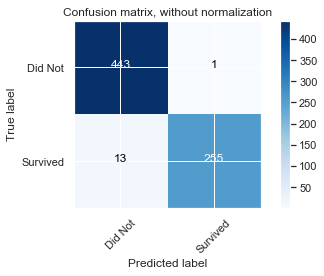

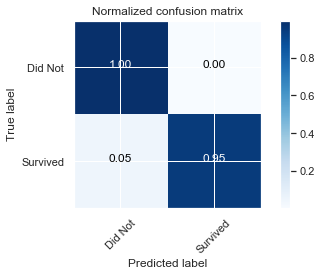

In [28]:
display_metrics(clf, X, Y)

# Test on X_test Dataset

In [29]:
# Create the test sets.
Xt = X_test
Yt = Y_test

print(Xt.shape, Yt.shape)
print(Xt.columns)

print_missing_values(Xt, 0)

(179, 9) (179,)
Index(['Parch', 'Fare', 'Pclass', 'Age_imputed', 'Embarked_imputed_C',
       'Embarked_imputed_Q', 'Embarked_imputed_S', 'Sex_female', 'Sex_male'],
      dtype='object')
Missing values per column:
Parch                 0
Fare                  0
Pclass                0
Age_imputed           0
Embarked_imputed_C    0
Embarked_imputed_Q    0
Embarked_imputed_S    0
Sex_female            0
Sex_male              0
dtype: int64


Score: 0.765363128491620
Feature  Percentage
              Fare    0.261599
       Age_imputed    0.236957
        Sex_female    0.158210
          Sex_male    0.150794
            Pclass    0.117846
             Parch    0.036406
Embarked_imputed_S    0.024057
Embarked_imputed_C    0.007969
Embarked_imputed_Q    0.006161
Score: 0.765363128491620
Confusion matrix, without normalization
[[81 24]
 [18 56]]
Normalized confusion matrix
[[0.77 0.23]
 [0.24 0.76]]


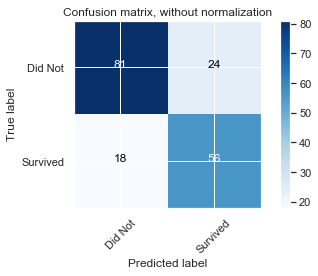

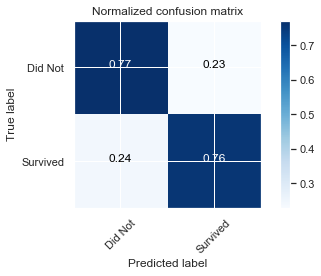

In [30]:
# Score the Classifier that performed best on the test set.
print("Score: %.15f" % clf.score(Xt, Yt))

# Print features importance.
helper_cv.print_features_importance(Xt, clf)

# Display metrics.
display_metrics(clf, Xt, Yt)

# CSV of Test Data Set Prediction

In [31]:
# Load the test set.
df_test_raw = pd.read_csv(base_path_data + '/test.csv', sep=",", header=0, encoding='utf-8')

print(df_test_raw.isna().any())
print(df_test_raw.dtypes)

# Show the result.
print_missing_values(df_test_raw, 0)

# print(df_test_raw.iloc[:10,])
df_test_raw.query('Fare != Fare')

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Missing values per column:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [32]:
from sklearn.preprocessing import Imputer

df_tmp = data_prep.impute(df_test_raw, df_test_raw, column='Age')
df_tmp = data_prep.impute(df_tmp, df_test_raw, column='Cabin', strategy='most_frequent')
df_tmp = data_prep.impute(df_tmp, df_test_raw, column='Fare', strategy='mean')

df_tmp = data_prep.select_features(df_tmp)
df_tmp.columns

Xt_raw = data_prep.get_one_hot(df_tmp, features=['Embarked', 'Sex']) # 'Cabin_imputed', 
print(df_test_raw.shape, Xt_raw.shape)

(418, 11) (418, 9)


In [33]:
# Show the result.
print_missing_values(Xt, 0)
print_missing_values(Xt_raw, 0)

Missing values per column:
Parch                 0
Fare                  0
Pclass                0
Age_imputed           0
Embarked_imputed_C    0
Embarked_imputed_Q    0
Embarked_imputed_S    0
Sex_female            0
Sex_male              0
dtype: int64
Missing values per column:
Fare_imputed    0
Parch           0
Pclass          0
Age_imputed     0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Sex_female      0
Sex_male        0
dtype: int64


In [34]:
X_test_given_predicted = clf.predict(Xt_raw)

# print(X_test.iloc[:10,])

In [35]:
import datetime

df_to_submit = pd.DataFrame(list(zip(df_test_raw.loc[:,'PassengerId'], X_test_given_predicted)))
df_to_submit.columns = ['PassengerId', 'Survived']
df_to_submit.PassengerId = df_to_submit.PassengerId.astype(np.int32)
df_to_submit.Survived = df_to_submit.Survived.astype(np.int32)

today = datetime.datetime.today()
today_s = today.strftime('%Y%m%d-%H%M')

csv_dest = "%s/csv_submission_%s.csv" % (base_path_data, today_s)

# Save the CSV
df_to_submit.to_csv(csv_dest, index=False)

print("test prediction save in:\n %s" % csv_dest)

test prediction save in:
 ../../data/csv_submission_20181102-1157.csv
